# Testy Funkcji

In [2]:

%load_ext autoreload
%autoreload 2

from PVS import PVS
import matplotlib.pyplot as plt

from funcs import *


pvc = PVS()

def get_stats(solutions): 
    print(np.mean(solutions), np.std(solutions))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


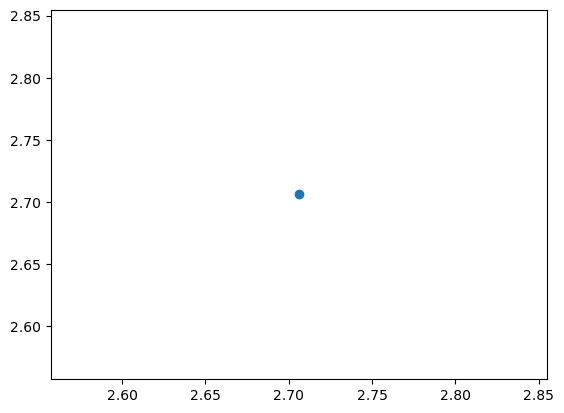

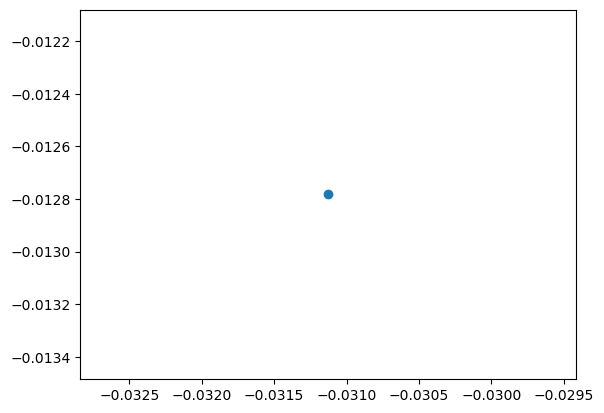

0.0 2.706000059857935


In [3]:
from results import Tester

def rastrigin_solver():
    return pvc.solve(rastrigin,60, 120, 5, -5.12, 5.12)

rastrigin_tester = Tester(rastrigin_solver,1)
rastrigin_tester.draw_y_plot()
rastrigin_tester.draw_2D_x_plot()
print(rastrigin_tester.get_y_std(), rastrigin_tester.get_y_mean())




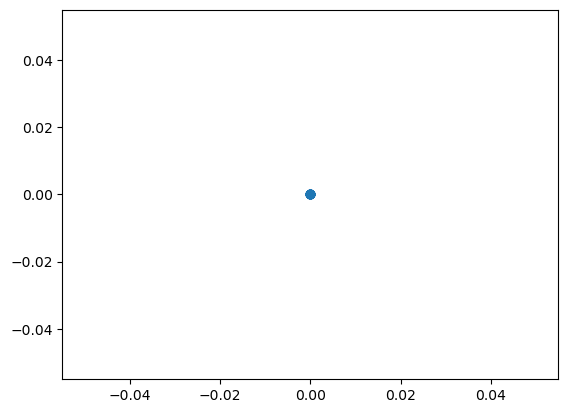

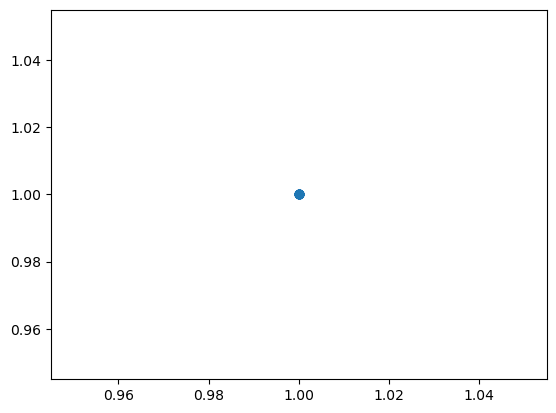

0.0 0.0


In [7]:


def rosenbrock_solver():
    return pvc.solve(rosenbrock, 30, 500, 2, -10, 10)

rosenbrock_tester = Tester(rosenbrock_solver,20)
rosenbrock_tester.draw_y_plot()
rosenbrock_tester.draw_2D_x_plot()
print(rosenbrock_tester.get_y_std(), rosenbrock_tester.get_y_mean())




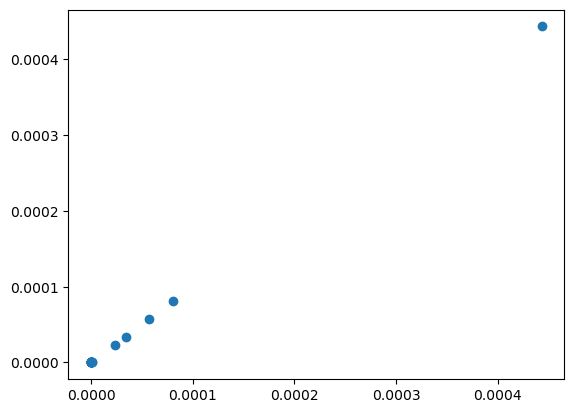

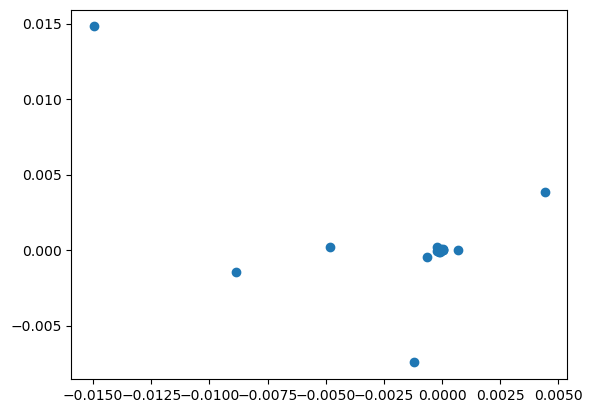

9.687274655672444e-05 3.198292626867058e-05


In [5]:

def sphere_solver():
    return pvc.solve(sphere_function, 15, 50, 2, -10, 10)

sphere_tester = Tester(sphere_solver,20)
sphere_tester.draw_y_plot()
sphere_tester.draw_2D_x_plot()
print(sphere_tester.get_y_std(), sphere_tester.get_y_mean())



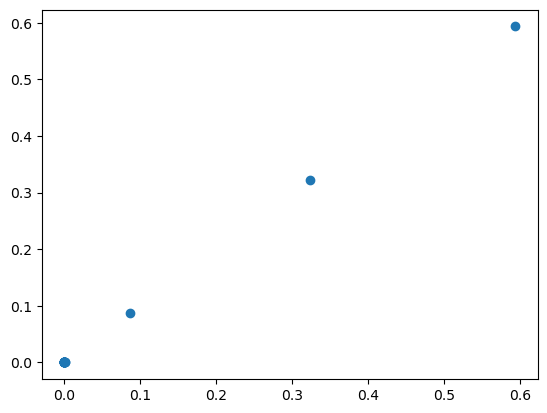

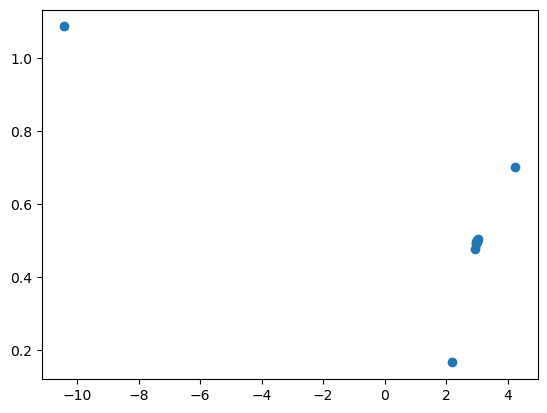

0.14373010554959897 0.050220432712650406


In [6]:

def beale_solver():
    return pvc.solve(beale_function, 15, 50, 2, -4.5, 4.5)

beale_tester = Tester(beale_solver,20)
beale_tester.draw_y_plot()
beale_tester.draw_2D_x_plot()
print(beale_tester.get_y_std(), beale_tester.get_y_mean())



133 282 335
111 268 371
111 244 395
133 292 325
120 269 361
122 327 301
132 268 350
106 280 364
118 275 357
132 249 369
132 257 361
103 270 377
131 280 339
115 269 366
109 280 361
128 283 339
129 276 345
142 251 357
128 266 356
138 263 349


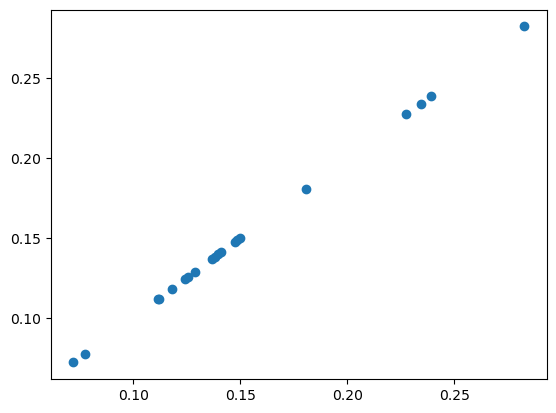

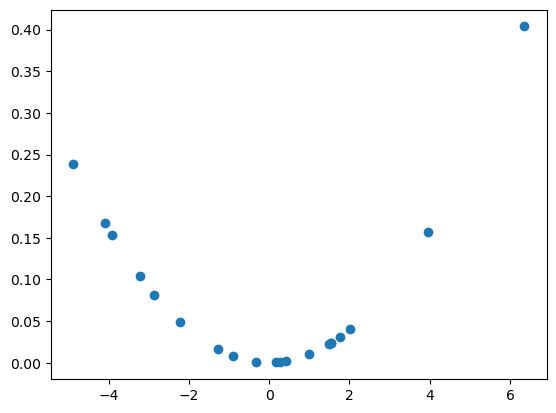

0.05342842747789113 0.15173066405605828


In [4]:

def bukin_solver():
    return pvc.solve(bukin_function_n6, 15, 50, 2, -3, 3)

bukin_tester = Tester(bukin_solver,20)
bukin_tester.draw_y_plot()
bukin_tester.draw_2D_x_plot()
print(bukin_tester.get_y_std(), bukin_tester.get_y_mean())



In [367]:
pvc.solve(rastrigin, 15, 25, 2, -5.12, 5.12)


[array([ 2.04951633, -0.18032166, 10.47362356]), array([ 1.99755882,  1.29625088, 18.53698246]), array([-2.0366593 ,  4.86574748, 31.43931016]), array([-4.96233523,  2.10651965, 31.49824979]), array([-2.09328283,  2.49485643, 32.2699517 ]), array([-0.78669791, -3.30933572, 32.92758311]), array([ 3.22487817, -3.18511534, 35.00806703]), array([ 3.03561088, -2.46902401, 35.37148726]), array([-2.28455411,  1.51395396, 39.6269167 ]), array([-4.07951846,  4.17450255, 40.723608  ]), array([-2.61587443, -0.62669653, 41.69550402]), array([ 4.18291307,  1.4468711 , 44.94670275]), array([-3.45404215,  3.82462729, 51.62512657]), array([ 4.12725906,  3.46179508, 51.76156547]), array([-4.62808262,  3.40405931, 68.17700049])]     First Argument  Second Argument      Value
0         2.049516        -0.180322  10.473624
1         1.997559         1.296251  18.536982
2        -2.036659         4.865747  31.439310
3        -4.962335         2.106520  31.498250
4        -2.093283         2.494856  32.2699

(array([ 0.97524803, -1.0014298 ]), 2.075064538479573)